In [1]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *

# Plotting Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
aes_data_dir    = '/Volumes/TI27457/ttb/circuits/aes-logs-50-2k'
uart_data_dir   = '/Volumes/TI27457/ttb/circuits/uart-logs-1-16'
aes_counter_df  = load_data_df(aes_data_dir)
uart_counter_df = load_data_df(uart_data_dir)

In [3]:
# Split Data by Counter Type
aes_ctype_groups  = aes_counter_df.groupby('Counter Type')
uart_ctype_groups = uart_counter_df.groupby('Counter Type')

# Plot Settings

In [4]:
# Plot Settings
FIG_WIDTH  = 12
FIG_HEIGHT = 6
SAVE_AS_PDF = True
AES_PDF_FILENAME = 'aes_false_positives.pdf'
UART_PDF_FILENAME = 'uart_false_positives.pdf'
CTYPES = ['CDD', 'CDN', 'CND', 'CNN', 'DDD', 'DDN', 'DND', 'DNN', 'TJFREE']

# Plot AES Data

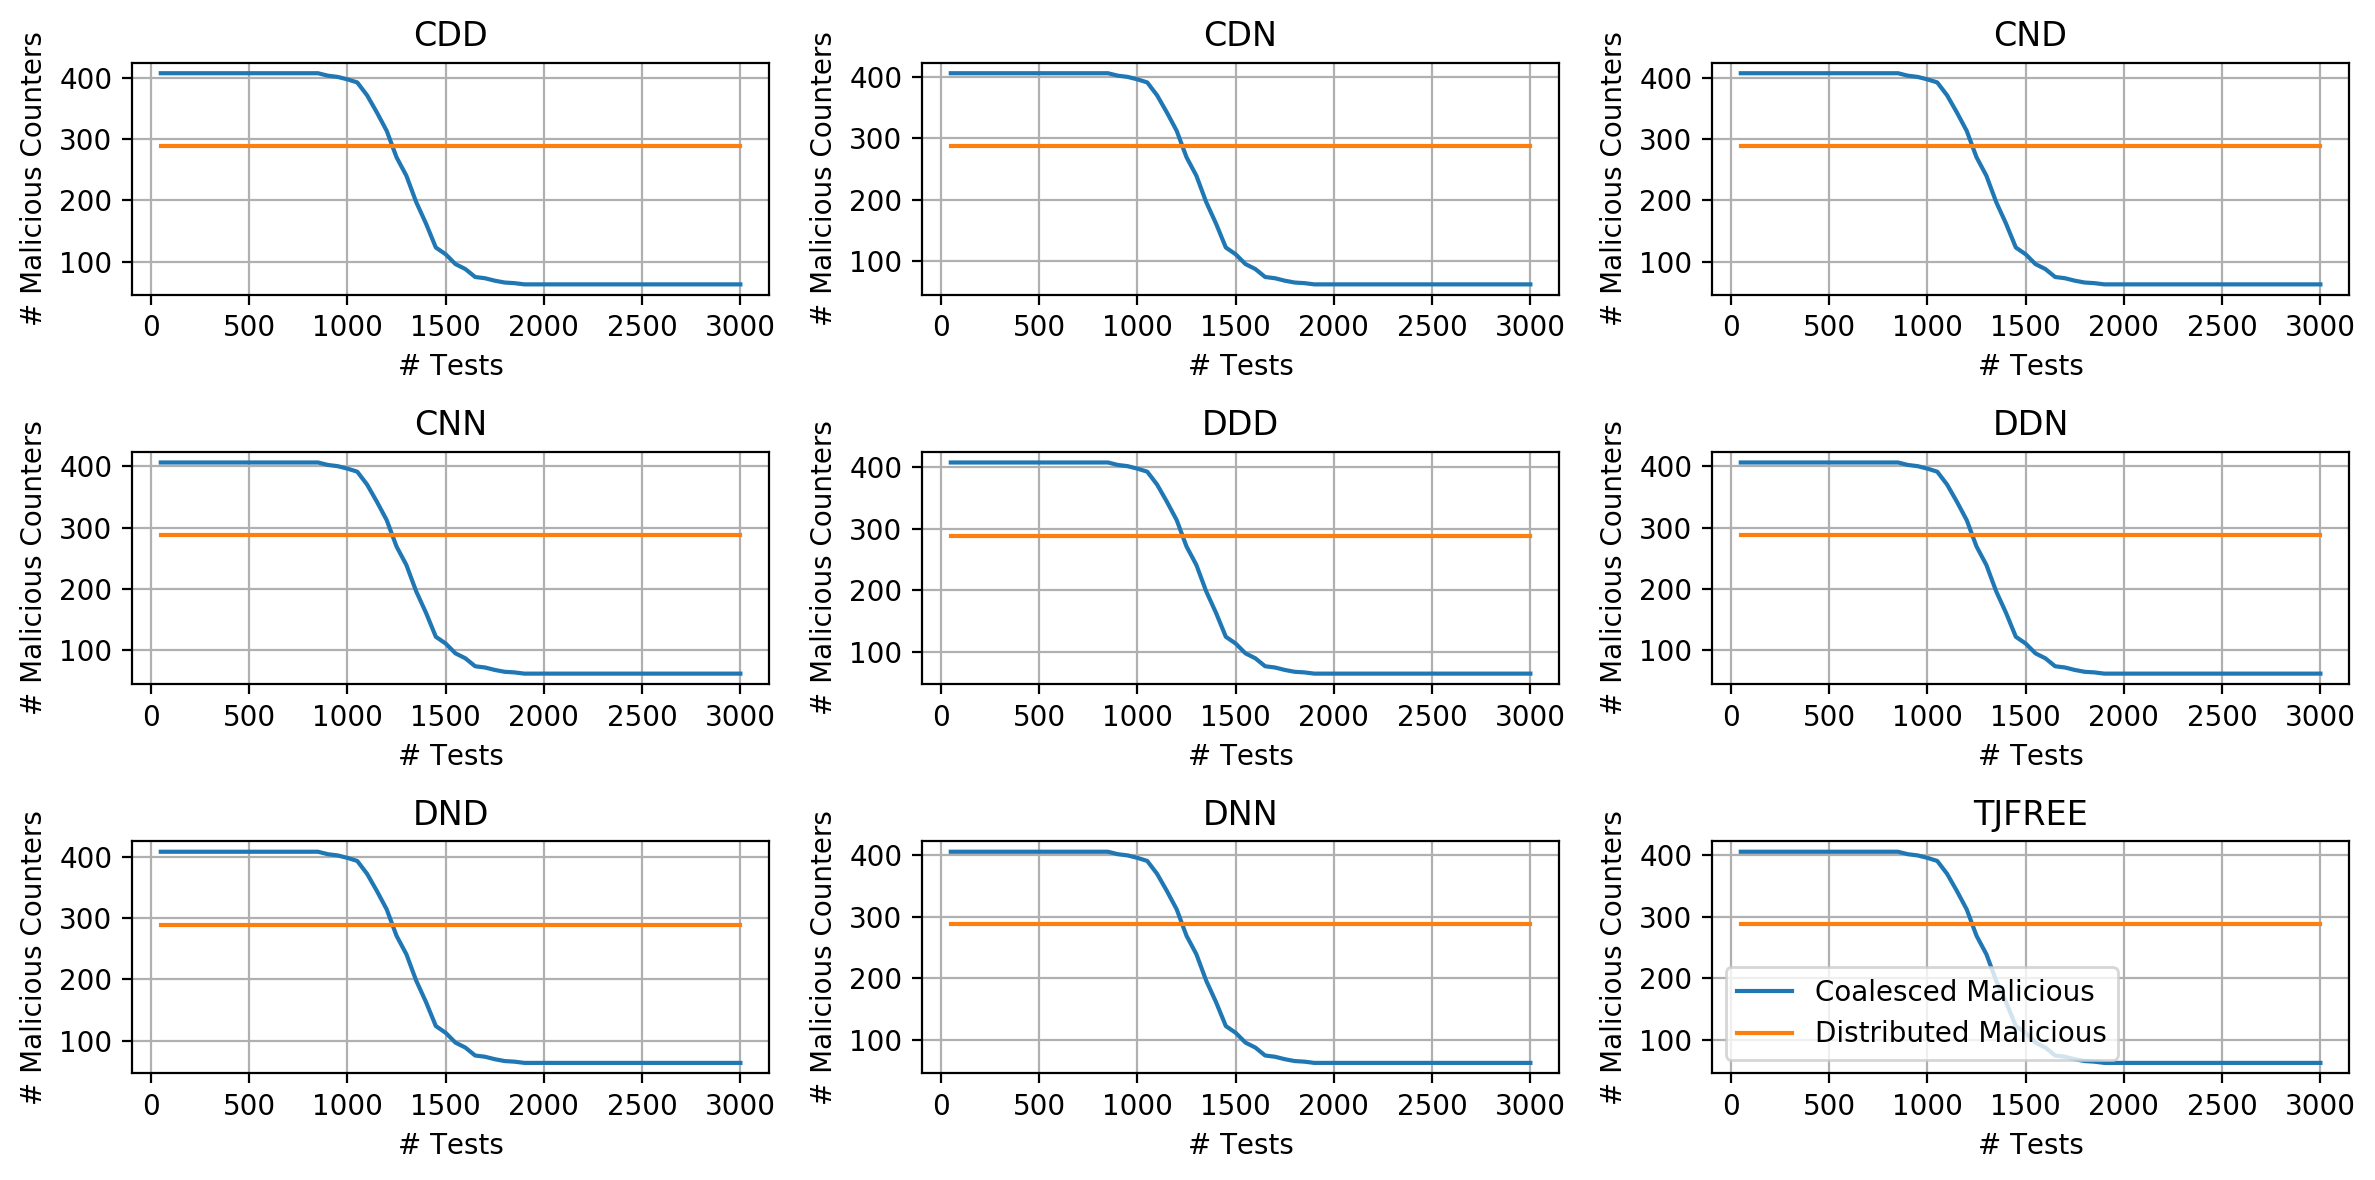

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

for i in range(len(axes.flat)):
    ax    = axes.flat[i]
    ctype = CTYPES[i]
    df    = aes_ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="# Tests", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="# Tests", y="Distributed Malicious", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('# Tests')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Distributed Malicious"])
plt.tight_layout(h_pad=1)

if SAVE_AS_PDF:
    plt.savefig(AES_PDF_FILENAME, format='pdf')

# Plot UART Data

KeyError: 'cdd'

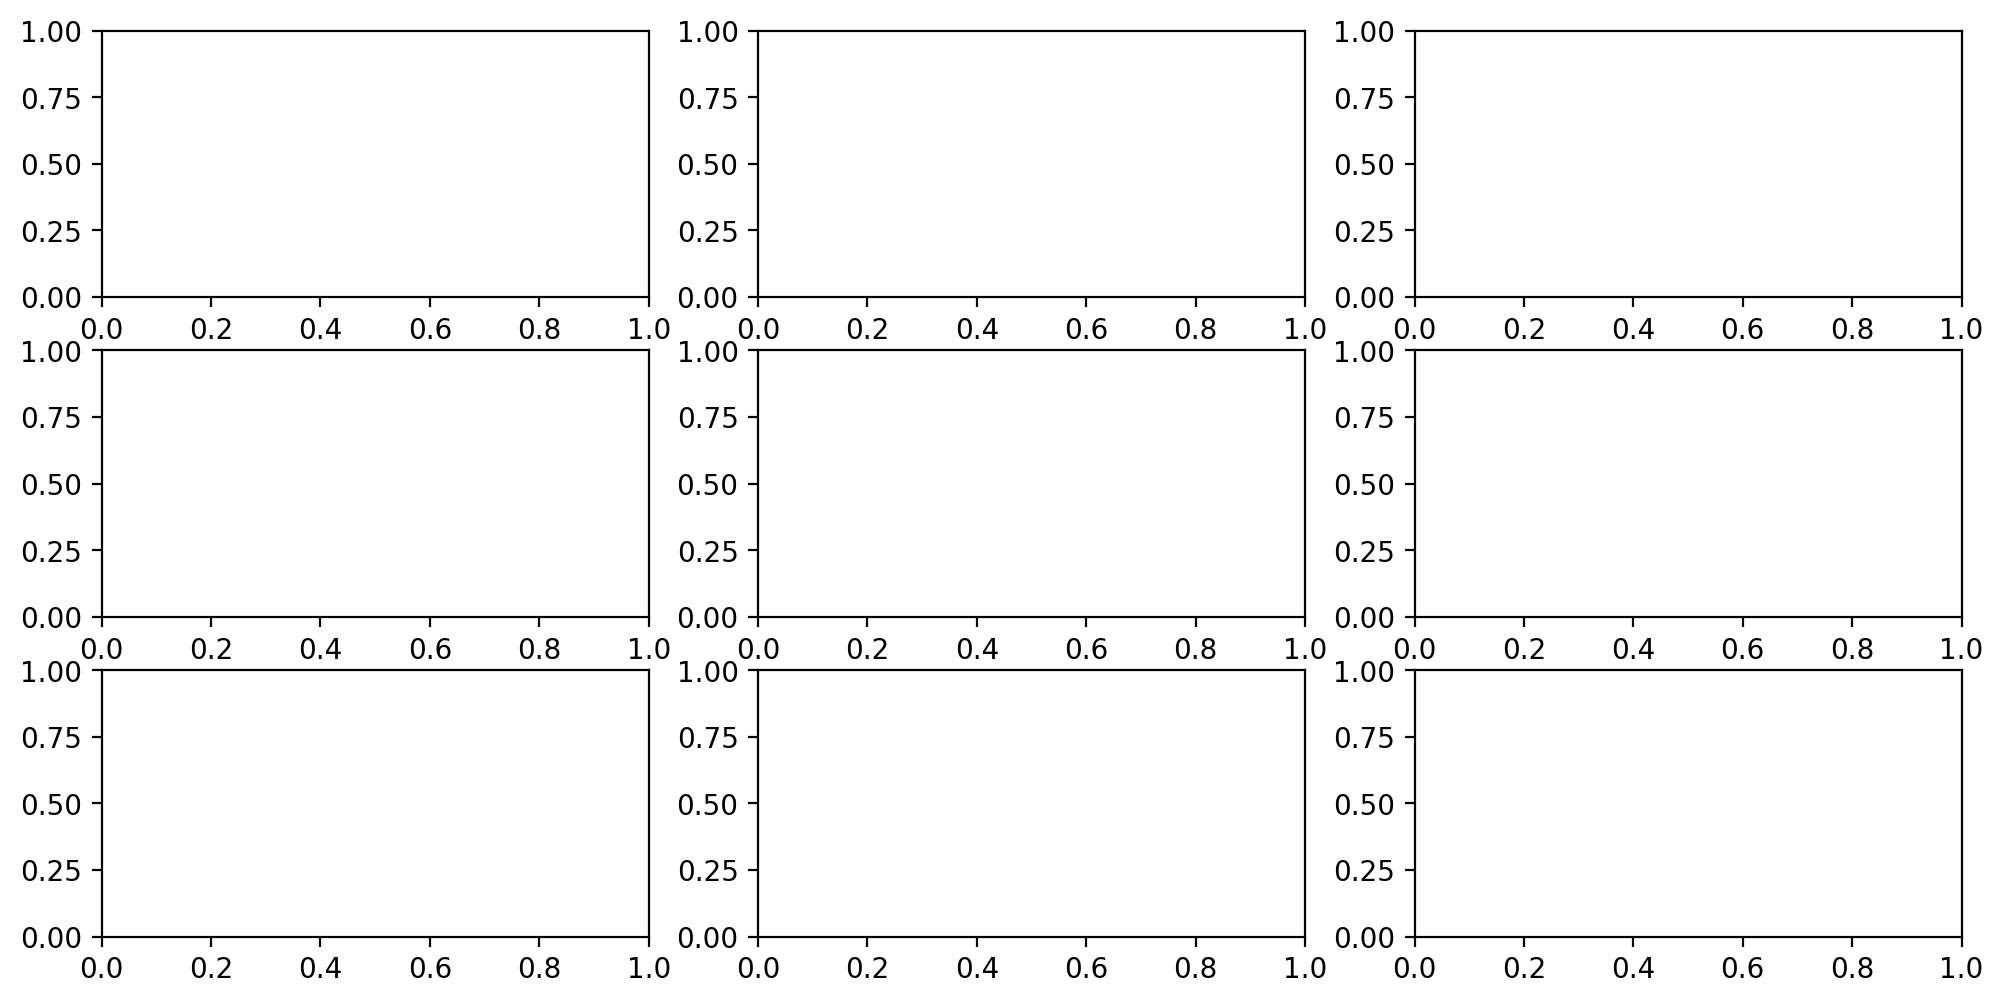

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

for i in range(len(axes.flat)):
    ax    = axes.flat[i]
    ctype = CTYPES[i]
    df    = uart_ctype_groups.get_group(ctype.lower())
    sns.lineplot(x="# Tests", y="Coalesced Malicious", data=df, ax=ax)
    sns.lineplot(x="# Tests", y="Distributed Malicious", data=df, ax=ax)
    ax.set_title(ctype)
    ax.set_ylabel('# Malicious Counters')
    ax.set_xlabel('# Tests')
    ax.grid()
plt.legend(labels=["Coalesced Malicious", "Distributed Malicious"])
plt.tight_layout(h_pad=1)

if SAVE_AS_PDF:
    plt.savefig(UART_PDF_FILENAME, format='pdf')